## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use("seaborn")

In [13]:
nhanes = pd.read_csv("nhanes.csv")

In [14]:
nhanes.describe()

,seqn,age,married,hsize,hincome,weight,height,bmi,waist,grip
count,10175.000000,10175.000000,5769.000000,10175.000000,10042.000000,9723.000000,9067.000000,9055.000000,8661.000000,7677.000000
mean,78644.000000,31.484128,2.571850,3.874693,10.884983,62.599054,155.883759,25.678244,87.272047,63.054891
std,2937.413829,24.421651,2.626299,1.722184,13.878864,32.331616,23.176270,7.955137,22.542605,25.098439
min,73557.000000,0.000000,1.000000,1.000000,1.000000,3.100000,79.700000,12.100000,40.200000,8.000000
25%,76100.500000,10.000000,1.000000,2.000000,5.000000,37.950000,149.500000,19.700000,71.200000,45.600000
50%,78644.000000,26.000000,1.000000,4.000000,8.000000,65.300000,162.000000,24.700000,87.800000,60.300000
75%,81187.500000,52.000000,5.000000,5.000000,14.000000,83.500000,171.050000,30.200000,102.800000,80.700000
max,83731.000000,80.000000,99.000000,7.000000,99.000000,222.600000,202.600000,82.900000,177.900000,162.800000


In [15]:
nhanes.head()

,seqn,gender,age,race,citizen,education,married,hsize,hincome,weight,height,bmi,waist,grip
0,73557,M,69,B,True,High School,4.0,3,4.0,78.3,171.3,26.7,100.0,55.2
1,73558,M,54,W,True,High School,1.0,4,7.0,89.5,176.8,28.6,107.6,61.5
2,73559,M,72,W,True,Some College,1.0,2,10.0,88.9,175.3,28.9,109.2,91.0
3,73560,M,9,W,True,NaN,NaN,4,9.0,32.2,137.3,17.1,61.0,32.2
4,73561,F,73,W,True,College,1.0,2,15.0,52.0,162.4,19.7,NaN,30.9


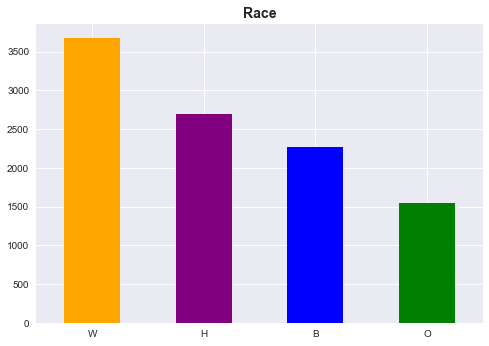

In [34]:
nhanes['race'].value_counts().plot(kind='bar', color=[['orange', 'purple', 'blue', 'green']], rot=0)
plt.title("Race", fontweight='bold', fontsize=14)
plt.show()

In [10]:
fatalities = pd.read_csv("2012_Workplace_Fatalities_by_State.csv")

In [5]:
fatalities.head()

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
0,"South Carolina\r(33.99882060100049, -81.045367...",63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,State
1,"West Virginia\r(38.665511497000466, -80.712639...",49.0,6.9,46.0,19800.0,4.1,1798.0,27.0,7.0,173.0,Federal
2,"Massachusetts\r(42.27687306500047, -72.0826898...",44.0,1.4,1.0,69700.0,3.1,1929.0,21.0,33.0,123.0,Federal
3,"Tennessee\r(35.680943063000484, -85.7744864219...",101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,State
4,"Oklahoma\r(35.472034350000456, -97.52106845499...",97.0,6.1,42.0,39000.0,3.6,1872.0,24.0,19.0,131.0,Federal


In [11]:
fatalities['State'] = fatalities['State'].map(lambda x: str(x).split('\r')[0])

In [12]:
fatalities.head()

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
0,South Carolina,63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,State
1,West Virginia,49.0,6.9,46.0,19800.0,4.1,1798.0,27.0,7.0,173.0,Federal
2,Massachusetts,44.0,1.4,1.0,69700.0,3.1,1929.0,21.0,33.0,123.0,Federal
3,Tennessee,101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,State
4,Oklahoma,97.0,6.1,42.0,39000.0,3.6,1872.0,24.0,19.0,131.0,Federal


In [3]:
fatalities.describe()

,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once
count,51.000000,51.000000,50.000000,42.000000,43.000000,50.000000,50.00000,49.000000,50.000000
mean,181.274510,4.300000,25.100000,64178.571429,3.620930,1727.880000,25.50000,38.979592,123.880000
std,641.619048,2.763548,14.733344,61912.808619,0.709983,963.377702,14.57738,38.594305,73.311647
min,8.000000,1.400000,1.000000,6500.000000,2.300000,363.000000,1.00000,5.000000,31.000000
25%,39.000000,2.600000,12.000000,26875.000000,3.150000,996.500000,13.25000,9.000000,85.000000
50%,70.000000,3.500000,25.000000,47250.000000,3.500000,1812.000000,25.50000,26.000000,111.500000
75%,114.500000,5.050000,37.750000,75625.000000,3.950000,2120.500000,37.75000,53.000000,134.000000
max,4628.000000,17.700000,50.000000,345400.000000,5.600000,6422.000000,50.00000,216.000000,521.000000
